In [49]:
import pandas as pd
import tqdm 
from tqdm import tqdm 
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"D:\Загрузки\movies.csv")

In [3]:
df['genre'].value_counts()

Comedy, Drama, Romance       476
Drama                        424
Comedy, Drama                403
Drama, Romance               335
Action, Crime, Drama         319
                            ... 
Adventure, Comedy, Action      1
Music                          1
Action, Comedy, Adventure      1
Action, History, Thriller      1
Mystery, Sci-Fi                1
Name: genre, Length: 423, dtype: int64

In [4]:
test= ['Drama']
test1=['Comedy']
df_test = pd.DataFrame(columns = df.columns )
df_test1 = pd.DataFrame(columns = df.columns )

In [5]:
for i, row in tqdm(df.iterrows()):
    if row['genre'] in test:
        df_test = df_test.append(row,ignore_index=True)

9849it [00:05, 1709.81it/s]


In [59]:
df_test_2 = df_test.fillna(0)
df_test_2['certificate'] = df_test_2['certificate'].replace('Not Rated','-')

In [60]:
df_test_2['rating_r']=df_test_2.apply(rating_r,axis=1)
df_test_2['rating_pg13']=df_test_2.apply(rating_pg13,axis=1)

In [62]:
df_test_2[(df_test_2['certificate']!=0)&(df_test_2['metascore']!=0)].sort_values(by=['metascore','rating','runtime','year'],ascending=[False,False,False,False],ignore_index=True)

,title,year,runtime,certificate,genre,director,stars,rating,metascore,votes,gross,rating_r,rating_pg13
0,Fanny and Alexander,1982,188,R,Drama,"['Ingmar Bergman', 'Bertil Guve', 'Pernilla Al...","['Bertil Guve', 'Pernilla Allwin', 'Kristina A...",8.1,100.0,65798,4.97,1,0
1,Tokyo Story,1953,136,-,Drama,"['Yasujirô Ozu', 'Chishû Ryû', 'Chieko Higashi...","['Chishû Ryû', 'Chieko Higashiyama', 'Sô Yamam...",8.1,100.0,65085,0.00,0,0
2,Boyhood,I) (2014,165,R,Drama,"['Richard Linklater', 'Ellar Coltrane', 'Patri...","['Ellar Coltrane', 'Patricia Arquette', 'Ethan...",7.9,100.0,361708,25.38,1,0
3,The Conformist,1970,113,R,Drama,"['Bernardo Bertolucci', 'Jean-Louis Trintignan...","['Jean-Louis Trintignant', 'Stefania Sandrelli...",7.9,100.0,32411,0.54,1,0
4,Moonlight,I) (2016,111,R,Drama,"['Barry Jenkins', 'Mahershala Ali', 'Naomie Ha...","['Mahershala Ali', 'Naomie Harris', 'Trevante ...",7.4,99.0,321283,27.85,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,I Am Sam,2001,132,PG-13,Drama,"['Jessie Nelson', 'Sean Penn', 'Michelle Pfeif...","['Sean Penn', 'Michelle Pfeiffer', 'Dakota Fan...",7.6,28.0,152967,40.31,0,1
327,War Room,2015,120,PG,Drama,"['Alex Kendrick', 'Priscilla C. Shirer', 'T.C....","['Priscilla C. Shirer', 'T.C. Stallings', 'Kar...",6.4,26.0,15592,67.79,0,0
328,Temptation: Confessions of a Marriage Counselor,2013,111,PG-13,Drama,"['Tyler Perry', 'Jurnee Smollett', 'Vanessa Wi...","['Jurnee Smollett', 'Vanessa Williams', 'Brand...",4.9,26.0,12278,51.98,0,1
329,A Family Man,2016,108,R,Drama,"['Mark Williams', 'Gerard Butler', 'Gretchen M...","['Gerard Butler', 'Gretchen Mol', 'Alison Brie...",6.5,21.0,12992,0.00,1,0


In [68]:
df_df_test_2 = df_test_2.drop(columns=['director','stars'],axis=1)

In [70]:
gp_1 = df_df_test_2.groupby(['year','rating_r','rating_pg13'])['rating'].mean().reset_index()

In [71]:
gp_r = gp_1[gp_1['rating_r']==1]
gr_pg = gp_1[gp_1['rating_pg13']==1]

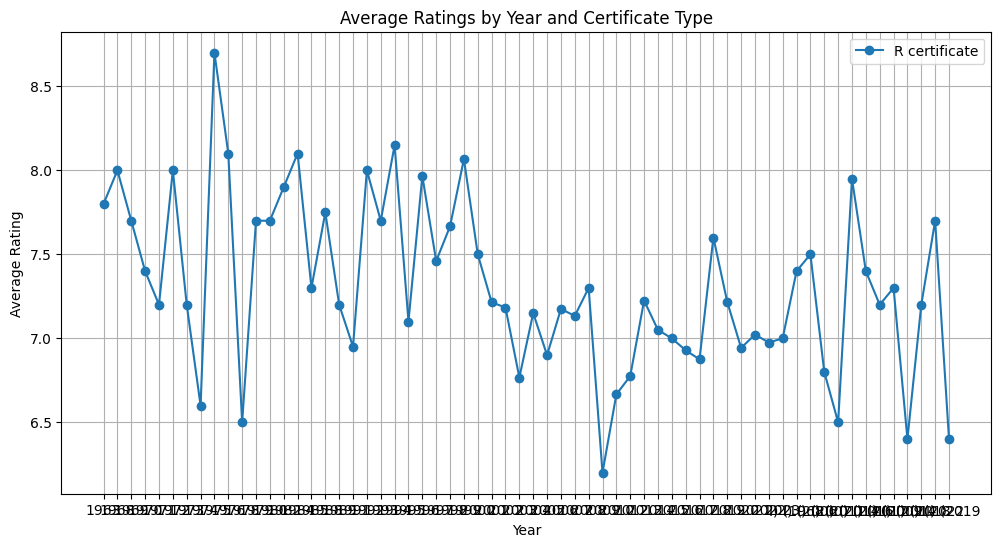

In [73]:
# Построение диаграммы
plt.figure(figsize=(12, 6))

plt.plot(gp_r['year'], gp_r['rating'], marker='o', label='R certificate')
# plt.plot(gr_pg['year'], gr_pg['rating'], marker='o', label='PG-13 certificate')

plt.title('Average Ratings by Year and Certificate Type')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.legend()

plt.grid(True)
plt.show()

# Comedy

In [7]:
for i, row in tqdm(df.iterrows()):
    if row['genre'] in test1:
        df_test1 = df_test1.append(row,ignore_index=True)

9849it [00:03, 2927.58it/s]


In [19]:
df2['certificate'] = df2['certificate'].replace('Not Rated','-')

In [28]:
df2['certificate'].value_counts()

R           102
PG-13        70
PG           31
0            17
-            14
TV-MA         4
Passed        3
TV-14         3
Unrated       2
NC-17         2
Approved      2
Name: certificate, dtype: int64

In [35]:
def rating_r(row):
    if row['certificate']=='R':
        return 1
    else:
        return 0 
def rating_pg13(row):
    if row['certificate']=='PG-13':
        return 1
    else:
        return 0 

In [36]:
df2['certificate_R'] = df2.apply(rating_r,axis=1)
df2['certificate_PG-13'] = df2.apply(rating_pg13,axis=1)

In [37]:
df2

,title,year,runtime,certificate,genre,director,stars,rating,metascore,votes,gross,certificate_R,certificate_PG-13
0,Tosun Pasa,1976,90,0,Comedy,"['Kartal Tibet', 'Kemal Sunal', 'Müjde Ar', 'A...","['Kemal Sunal', 'Müjde Ar', 'Adile Nasit', 'Se...",8.9,0.0,24068,0.00,0,0
1,The Chaos Class Failed the Class,1975,91,0,Comedy,"['Ertem Egilmez', 'Kemal Sunal', 'Münir Özkul'...","['Kemal Sunal', 'Münir Özkul', 'Semra Özdamar'...",8.9,0.0,24097,0.00,0,0
2,"When I Grow Up, I'll Be a Kangaroo",2004,92,0,Comedy,"['Radivoje Andric', 'Sergej Trifunovic', 'Mari...","['Sergej Trifunovic', 'Marija Karan', 'Nebojsa...",8.4,0.0,11174,0.00,0,0
3,Young Frankenstein,1974,106,PG,Comedy,"['Mel Brooks', 'Gene Wilder', 'Madeline Kahn',...","['Gene Wilder', 'Madeline Kahn', 'Marty Feldma...",8.0,83.0,164036,86.30,0,0
4,Life of Brian,1979,94,R,Comedy,"['Terry Jones', 'Graham Chapman', 'John Cleese...","['Graham Chapman', 'John Cleese', 'Michael Pal...",8.0,77.0,412344,20.05,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,Casino Royale,1967,131,Approved,Comedy,"['Val Guest', 'Ken Hughes', 'John Huston', 'Jo...","['Ken Hughes', 'John Huston', 'Joseph McGrath'...",5.0,48.0,31362,0.00,0,0
246,Porky's II: The Next Day,1983,98,R,Comedy,"['Bob Clark', 'Dan Monahan', 'Wyatt Knight', '...","['Dan Monahan', 'Wyatt Knight', 'Mark Herrier'...",5.0,38.0,12493,33.76,1,0
247,Lottery Ticket,I) (2010,99,PG-13,Comedy,"['Erik White', 'Shad Moss', 'Brandon T. Jackso...","['Shad Moss', 'Brandon T. Jackson', 'Naturi Na...",5.0,50.0,11356,24.71,0,1
248,Year One,2009,97,PG-13,Comedy,"['Harold Ramis', 'Jack Black', 'Michael Cera',...","['Jack Black', 'Michael Cera', 'Olivia Wilde',...",4.9,34.0,101310,43.34,0,1


In [11]:
df2 = df_test1.fillna(0)

In [38]:
df2[(df2['certificate']!=0)&(df2['rating']>5.5)].sort_values(by=['gross','runtime','rating','year'],ascending=[False,False,False,False],ignore_index=True)

,title,year,runtime,certificate,genre,director,stars,rating,metascore,votes,gross,certificate_R,certificate_PG-13
0,The Hangover,2009,100,R,Comedy,"['Todd Phillips', 'Zach Galifianakis', 'Bradle...","['Zach Galifianakis', 'Bradley Cooper', 'Justi...",7.7,73.0,816244,277.32,1,0
1,The Hangover Part II,2011,102,R,Comedy,"['Todd Phillips', 'Bradley Cooper', 'Zach Gali...","['Bradley Cooper', 'Zach Galifianakis', 'Ed He...",6.5,44.0,518651,254.46,1,0
2,Ted,2012,106,R,Comedy,"['Seth MacFarlane', 'Mark Wahlberg', 'Mila Kun...","['Mark Wahlberg', 'Mila Kunis', 'Seth MacFarla...",6.9,62.0,635772,218.82,1,0
3,Grown Ups,I) (2010,102,PG-13,Comedy,"['Dennis Dugan', 'Adam Sandler', 'Salma Hayek'...","['Adam Sandler', 'Salma Hayek', 'Kevin James',...",5.9,30.0,263666,162.00,0,1
4,Scary Movie,2000,88,R,Comedy,"['Keenen Ivory Wayans', 'Anna Faris', 'Jon Abr...","['Anna Faris', 'Jon Abrahams', 'Marlon Wayans'...",6.2,48.0,274093,157.02,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,Ali G Indahouse,2002,85,R,Comedy,"['Mark Mylod', 'Sacha Baron Cohen', 'Emilio Ri...","['Sacha Baron Cohen', 'Emilio Rivera', 'Gina L...",6.2,46.0,94125,0.00,1,0
193,Monsieur Hulot's Holiday,1953,83,-,Comedy,"['Jacques Tati', 'Jacques Tati', 'Nathalie Pas...","['Jacques Tati', 'Nathalie Pascaud', 'Michelin...",7.3,0.0,19552,0.00,0,0
194,The Kentucky Fried Movie,1977,83,R,Comedy,"['John Landis', 'Evan C. Kim', 'Bong Soo Han',...","['Evan C. Kim', 'Bong Soo Han', 'Bill Bixby', ...",6.4,61.0,19549,0.00,1,0
195,Between Two Ferns: The Movie,2019,82,TV-MA,Comedy,"['Scott Aukerman', 'Zach Galifianakis', 'Matth...","['Zach Galifianakis', 'Matthew McConaughey', '...",6.1,59.0,35322,0.00,0,0


In [39]:
df3 = df2[(df2['certificate']!=0)&(df2['rating']>5.5)].sort_values(by=['gross','runtime','rating','year'],ascending=[False,False,False,False],ignore_index=True)

In [41]:
df4 = df3.drop(columns=['director','stars'],axis=1)

In [45]:
gp = df4.groupby(['year','certificate_R','certificate_PG-13'])['rating'].mean().reset_index()

In [48]:
gp_r = gp[gp['certificate_R']==1]
gr_pg = gp[gp['certificate_PG-13']==1]

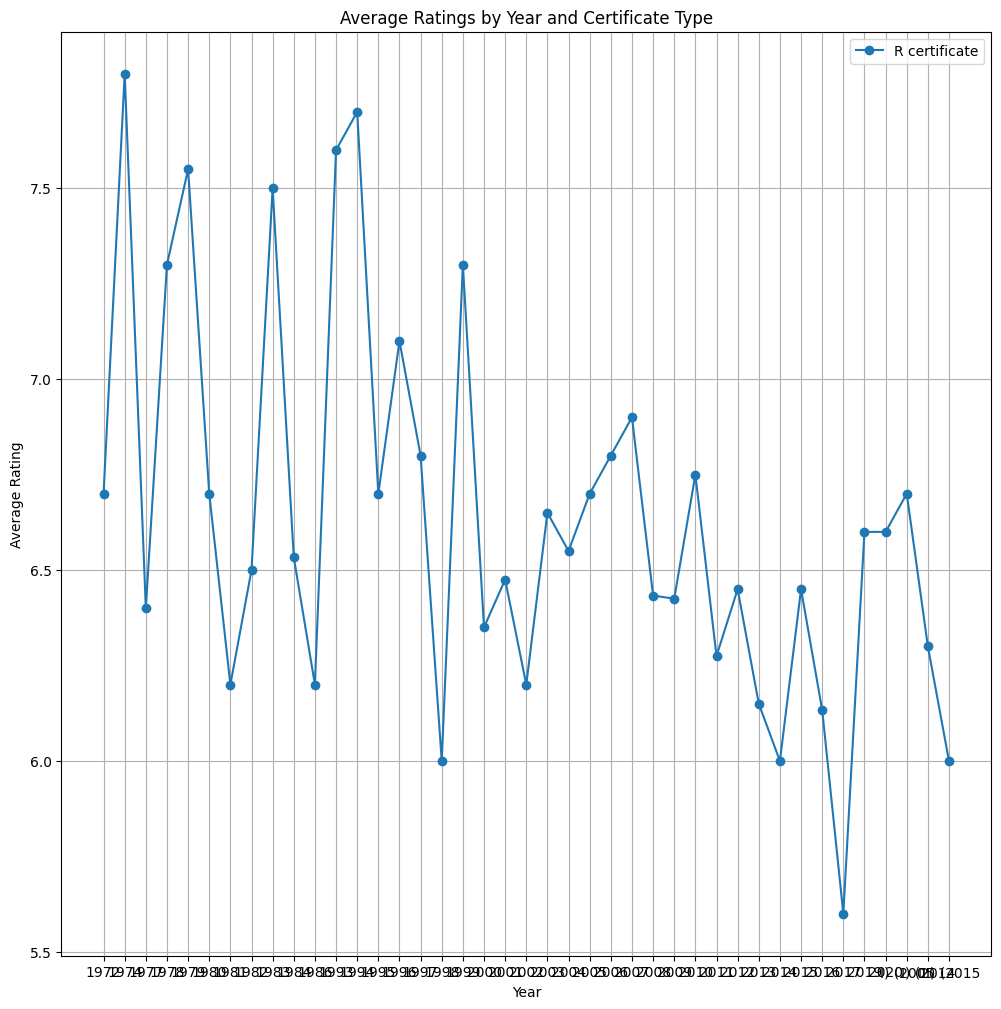

In [55]:
# Построение диаграммы
plt.figure(figsize=(12, 12))

plt.plot(gp_r['year'], gp_r['rating'], marker='o', label='R certificate')
# plt.plot(gr_pg['year'], gr_pg['rating'], marker='o', label='PG-13 certificate')

plt.title('Average Ratings by Year and Certificate Type')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.legend()

plt.grid(True)
plt.show()

# Comedy